# Sales prediction model
### Project Overview
In this study, our primary objective is to develop a machine learning and deep learning model that leverages historical sales data of similar products to predict the sales of unsold items.

We have data from a chain of stores selling food items. The data is divided into 2 datasets - 
- Train data (historical data with target column)
- Test data (Prediction dataset with no target column)

### Steps
1) Loading the Data
2) Data Cleaning, Exploration and Visualisation
3) Data Pre-processing
4) Machine Learning using sklearn
5) Deep Learning using tensorflow and keras
6) Predicting the value for our Prediction dataset
7) Conclusions

Definitions for the variables in our dataset


![Image Alt Text](Item_descriptions.png)

### Step 1: Loading the data

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the datasets

df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

### Step 2: Data cleaning, exploration and visusalisation

In [3]:
print("length of dataset:",len(df_train))
df_train.head()

length of dataset: 8523


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [5]:
# We can vaguely see we have multiple datatypes in our dataset
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# Checking for null data
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

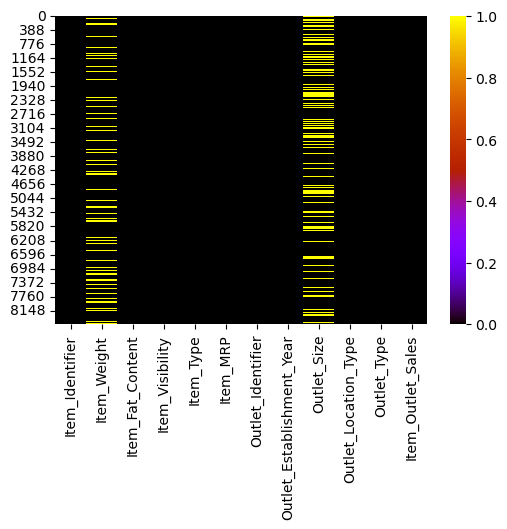

In [7]:
# Visualizing the null values
plt.figure(figsize=(6,4))
sns.heatmap(df_train.isnull(),cmap='gnuplot')
plt.show()

As we can see, quite a bit of null values in item_weight and outlet_size.

We'll first explore our data, before deciding what to do with these null values

We will go through each of the columns to see what we have, look for outliers, and clean the data if required.

In [8]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

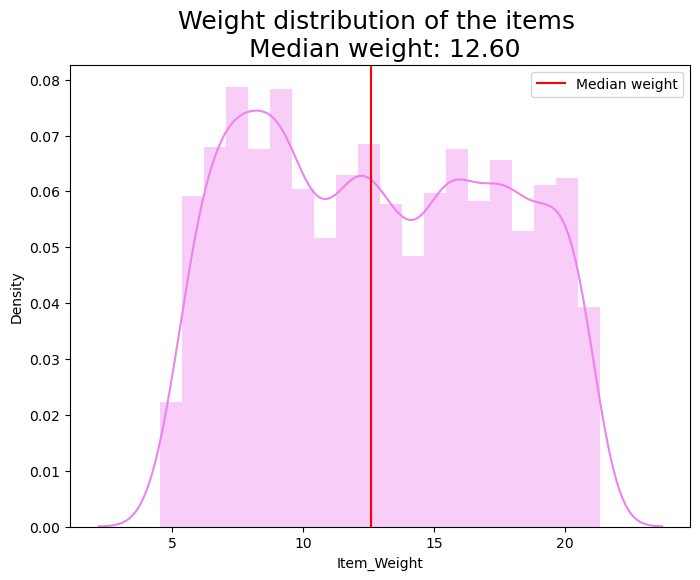

In [9]:
# Plotting a histogram for Item Weight
plt.figure(figsize=(8,6))
sns.distplot(df_train['Item_Weight'].dropna(),color='violet')
plt.title('Weight distribution of the items \n Median weight: {0:.2f}'.format(df_train['Item_Weight'].dropna().median()),size=18)
plt.axvline(df_train['Item_Weight'].dropna().median(),color='red',label='Median weight')
plt.legend()
plt.show()

In [10]:
df_train['Item_Weight'].dropna().mean()
# Not much difference between item_weight mean and median

12.857645184135977

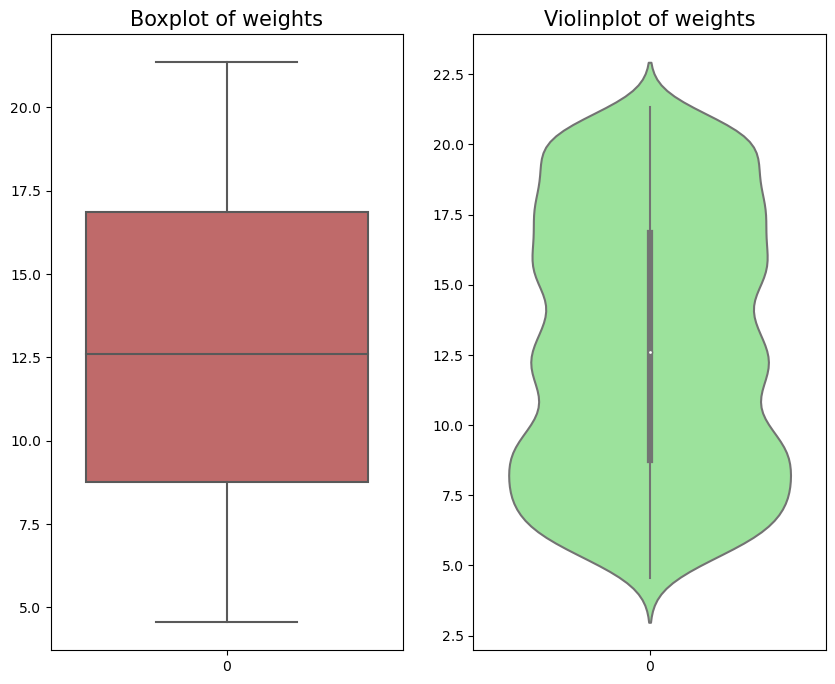

In [11]:
# Drawing a boxplot and a violinplot of item_weight
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(121)
sns.boxplot(df_train['Item_Weight'],ax=ax1,orient='v',color='indianred')
ax1.set_title('Boxplot of weights',size=15)

ax2=fig1.add_subplot(122)
sns.violinplot(df_train['Item_Weight'],ax=ax2,orient='v',color='lightgreen')
ax2.set_title('Violinplot of weights',size=15)

plt.show()

From the violin and distplot visualizations above, it's evident that the weight distribution levels off across a wide range of values. This means that assigning a single weight value to the null entries is not a straightforward task. Therefore, we have the option to either retain these null values or consider their removal from our analysis, depending on their relevance in our overall study.

In [12]:
# Next lets look other columns, starting with fat_content
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

There's a data entry issue with this column. Essentially the column boils down to 2 values low fat and
regular fat.

We can fix that

In [13]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('low fat','Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('LF','Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('reg','Regular')
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
# Lets draw a pie plot to see the amount of low fat vs regular fat items
df_train['Count'] = 1
df_fat = df_train.groupby('Item_Fat_Content')['Count'].sum().reset_index()

fig2 = px.pie(df_fat,values='Count',names='Item_Fat_Content',hole=0.4)

fig2.update_layout(title='Fat content',title_x=0.48,
                  annotations=[dict(text='Fat',font_size=15, showarrow=False,height=800,width=900)])
fig2.update_traces(textfont_size=15,textinfo='percent+label')
fig2.show()

We can see majority of our consumers prefer low fat food items

Next lets, move on to Item_visibilty

In [15]:
df_train['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

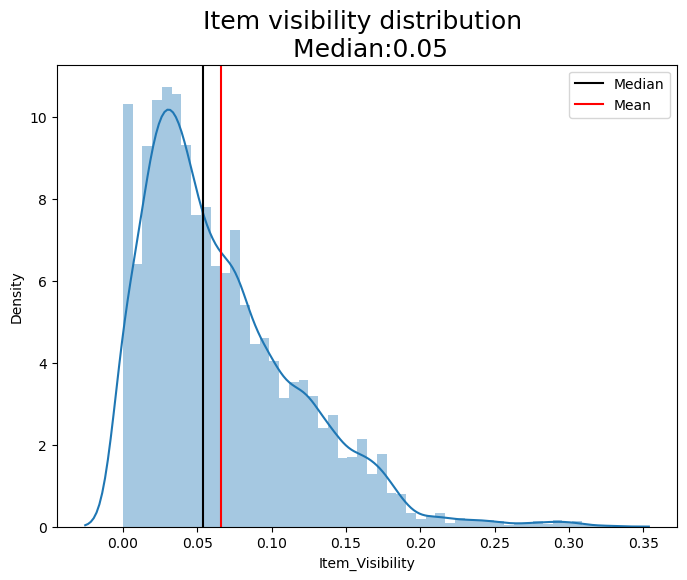

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(df_train['Item_Visibility'])
plt.title('Item visibility distribution \n Median:{0:.2f}'.format(df_train['Item_Visibility'].median()),size=18)
plt.axvline(df_train['Item_Visibility'].median(),color='black',label='Median')
plt.axvline(df_train['Item_Visibility'].mean(),color='red',label='Mean')
plt.legend()

As we see from the curve, the item visibility has a right skew. Hence, a median would give us better indication than a mean value. Let us check for outliers if any.

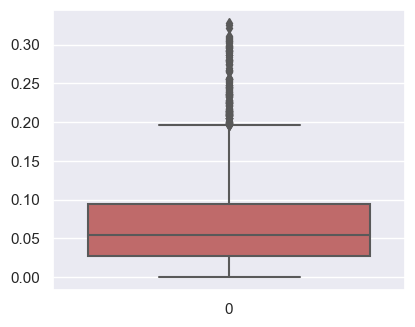

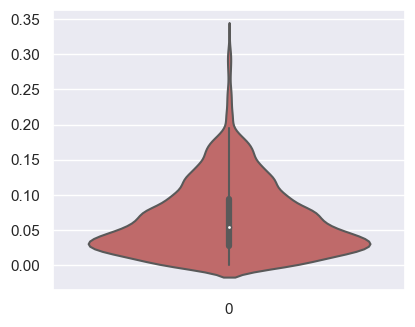

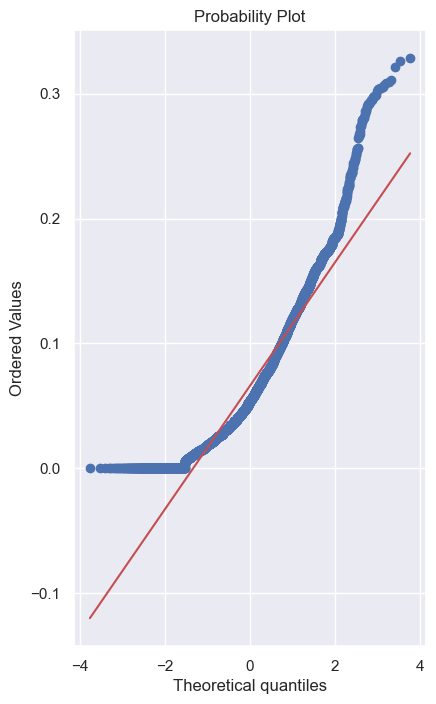

In [17]:
sns.set()
fig3 = plt.figure(figsize=(10,8))
ax1 = fig3.add_subplot(221)
sns.boxplot(df_train['Item_Visibility'], orient='v', ax=ax1, color='indianred')

fig3 = plt.figure(figsize=(10,8))
ax2 = fig3.add_subplot(222)
sns.violinplot(df_train['Item_Visibility'], orient='v', ax=ax2, color='indianred')

fig3=plt.figure(figsize=(10,8))
ax3=fig3.add_subplot(122)
stats.probplot(df_train['Item_Visibility'],plot=ax3)
plt.show()

As we can see, values above 0.2 visibility are outliers. Presence of outliers doesn't bode well with machine learning algos. Hence, we need to remove the outliers and try to form a normal distribution.

The probplot also seems to suggest that the values are deviating from the normal values after 0.2

Let us check the number entries with item visibility above 0.2 as outliers.

In [18]:
len(df_train[df_train['Item_Visibility']>=0.2])

134

Out of the 8000+ values, only 134 seem to be item_visibility outliers, so its viable for us to remove these values without affecting our dataset too much

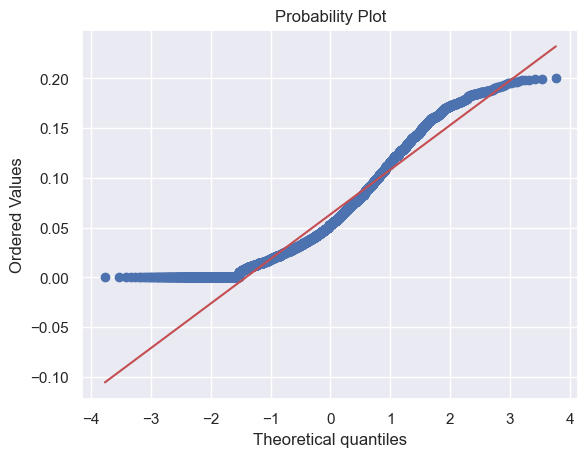

In [19]:
df_train=df_train[df_train['Item_Visibility']<0.2]
stats.probplot(df_train['Item_Visibility'],plot=plt)
plt.show()

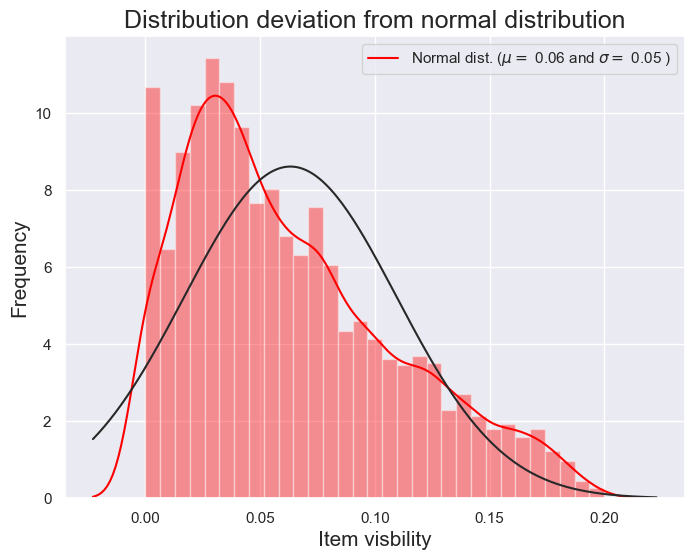

In [20]:
# Lets check the distribution once again
plt.figure(figsize=(8,6))
sns.distplot(df_train['Item_Visibility'],fit=norm,color='red')
plt.title('Distribution deviation from normal distribution',size=18)
plt.ylabel('Frequency',size=15)
plt.xlabel('Item visbility',size=15)
mu=df_train['Item_Visibility'].mean()
sigma=df_train['Item_Visibility'].std()
plt.legend(['Normal dist. ($\mu=$ {0:.2f} and $\sigma=$ {1:.2f} )'.format(mu, sigma)])

After removing the outliers, this is as close as we can get to a normal distribution for the visibility column, lets move on to the next column

We'll draw a pie plot and a sunburst plot for our item types column

In [21]:
df_type=df_train.groupby('Item_Type')['Count'].sum().reset_index()
df_type.head()

Item_Type  Count
0  Baking Goods    633
1        Breads    248
2     Breakfast    106
3        Canned    639
4         Dairy    670

In [22]:
df_type = df_train.groupby('Item_Type')['Count'].sum().reset_index()
fig5 = px.pie(df_type,values='Count',names='Item_Type')
fig5.update_layout(title='Item distribution',title_x=0.44,title_y=0.95)
fig5.update_traces(textfont_size=15,textinfo='percent')
fig5.show()

In [23]:
# Drawing the sunburst plot

fig4 = px.sunburst(df_train,path=['Item_Type','Item_Fat_Content'],names='Item_Type',color_continuous_scale='RdBu')
fig4.update_layout(title='Item types',title_x=0.1,title_y=0.8,
                  annotations=[dict(showarrow=True,height=1000,width=900)],margin=dict(l=20, r=20, t=20, b=20))
fig4.show()

From the above plot, we see that fruits and vegetables were the highest sold item followed closely by Snack foods.

Next, we'll move onto the MRP column



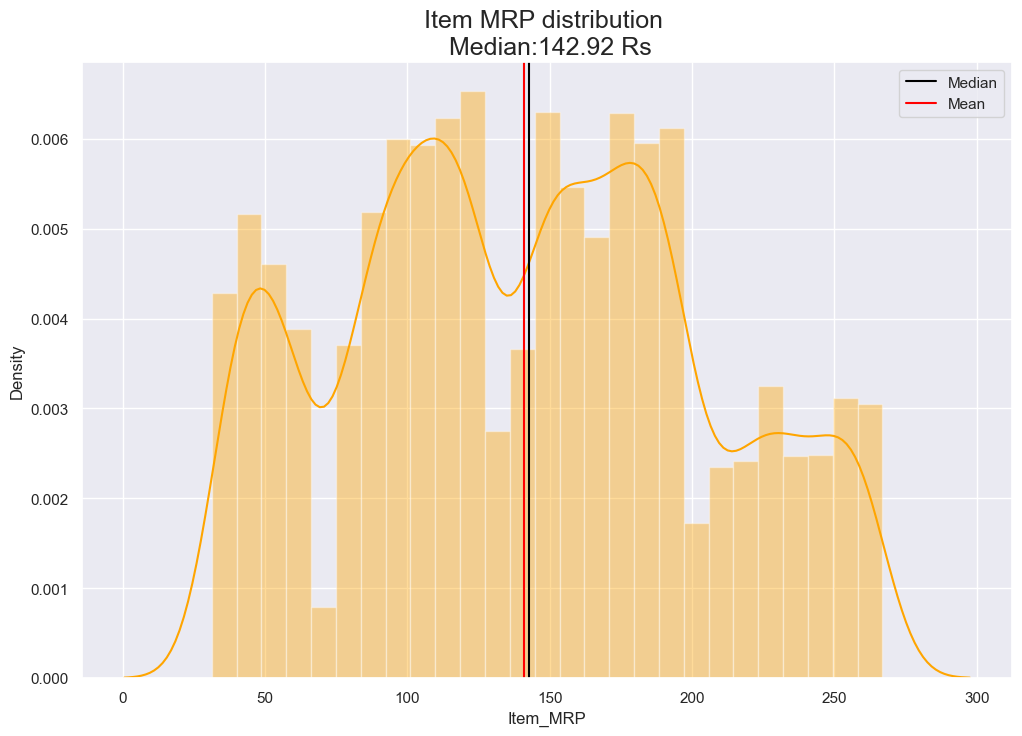

In [24]:
plt.figure(figsize=(12,8))
sns.distplot(df_train['Item_MRP'],color='orange')
plt.title('Item MRP distribution \n Median:{0:.2f} Rs'.format(df_train['Item_MRP'].median()),size=18)
plt.axvline(df_train['Item_MRP'].median(),color='black',label='Median')
plt.axvline(df_train['Item_MRP'].mean(),color='red',label='Mean')
plt.legend()
plt.show()

As we can see, we don't see any clear distribution of the price here. It is a multi modal distribution with mulitple peaks.

The graph basically:

- First peak is somewhere between 25 and 60$

- Second peak is somewhere between 70 and 125$

- There's another uptick in the 150-200$ range.

- There's decent amount of sales in the 220-260$ range as well.

Let us try to check the boxplots of how MRPs change with item products

In [25]:
labels=df_train['Item_Type'].unique()
labels

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

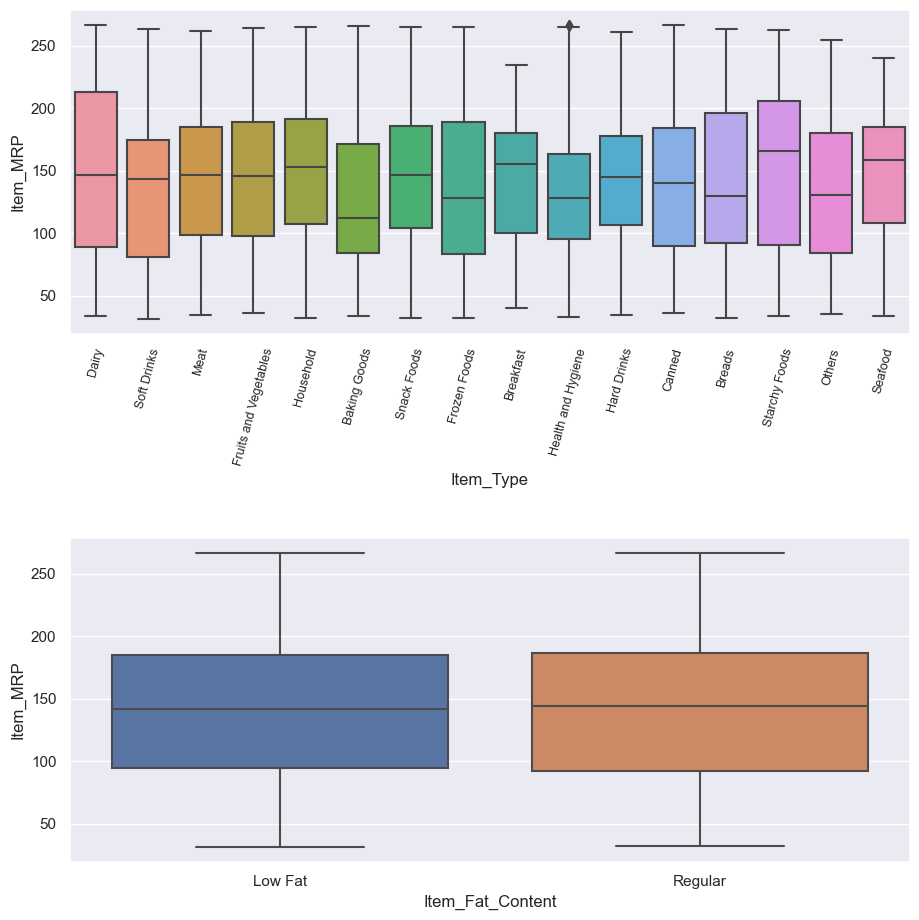

In [26]:
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_MRP',data=df_train,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_MRP',data=df_train,ax=ax2)

fig6.tight_layout(pad=3) #For spacing between subplots

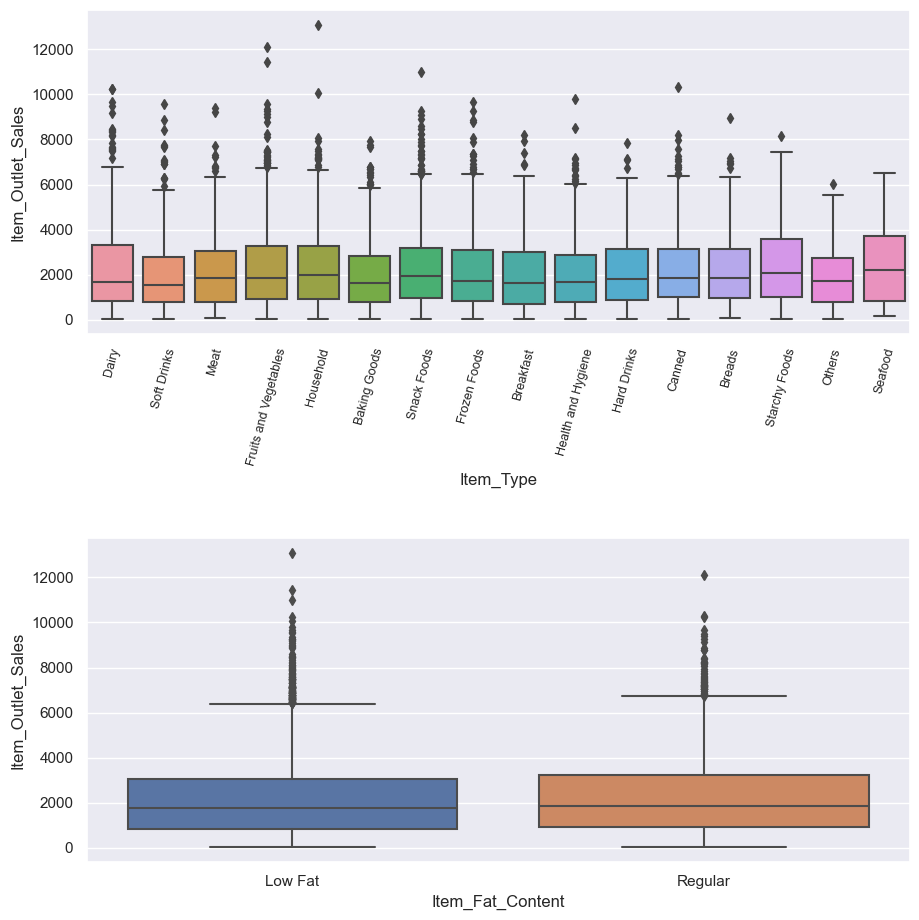

In [125]:
fig6=plt.figure(figsize=(10,10))
ax1=fig6.add_subplot(211)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=df_train,ax=ax1)
ax1.set_xticklabels(labels, rotation=75,size=9)

ax2=fig6.add_subplot(212)
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train,ax=ax2)

fig6.tight_layout(pad=3) #For spacing between subplots

We can see dairy products and starchy foods have high median prices. 

Whereas Starchy foods and Seafood are making higher median sales.

Nothing else stands out in terms of food items.

The fat content in an item (low or regular) does'nt seem to affect the price or the sales of the products.

Moving onto outlets.

Lets see which outlets are doing well

In [27]:
df_outlets=df_train.groupby('Outlet_Identifier')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_outlets

Outlet_Identifier  Count
5            OUT027    935
1            OUT013    932
6            OUT035    930
8            OUT046    930
9            OUT049    930
7            OUT045    929
3            OUT018    928
2            OUT017    926
0            OUT010    493
4            OUT019    456

In [28]:
df_outlets_2=df_train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index().sort_values(by='Item_Outlet_Sales',ascending=False)
df_outlets_2

Outlet_Identifier  Item_Outlet_Sales
5            OUT027       3.453926e+06
6            OUT035       2.268123e+06
9            OUT049       2.183970e+06
2            OUT017       2.167465e+06
1            OUT013       2.142664e+06
8            OUT046       2.118395e+06
7            OUT045       2.036725e+06
3            OUT018       1.851823e+06
0            OUT010       1.690786e+05
4            OUT019       1.537978e+05

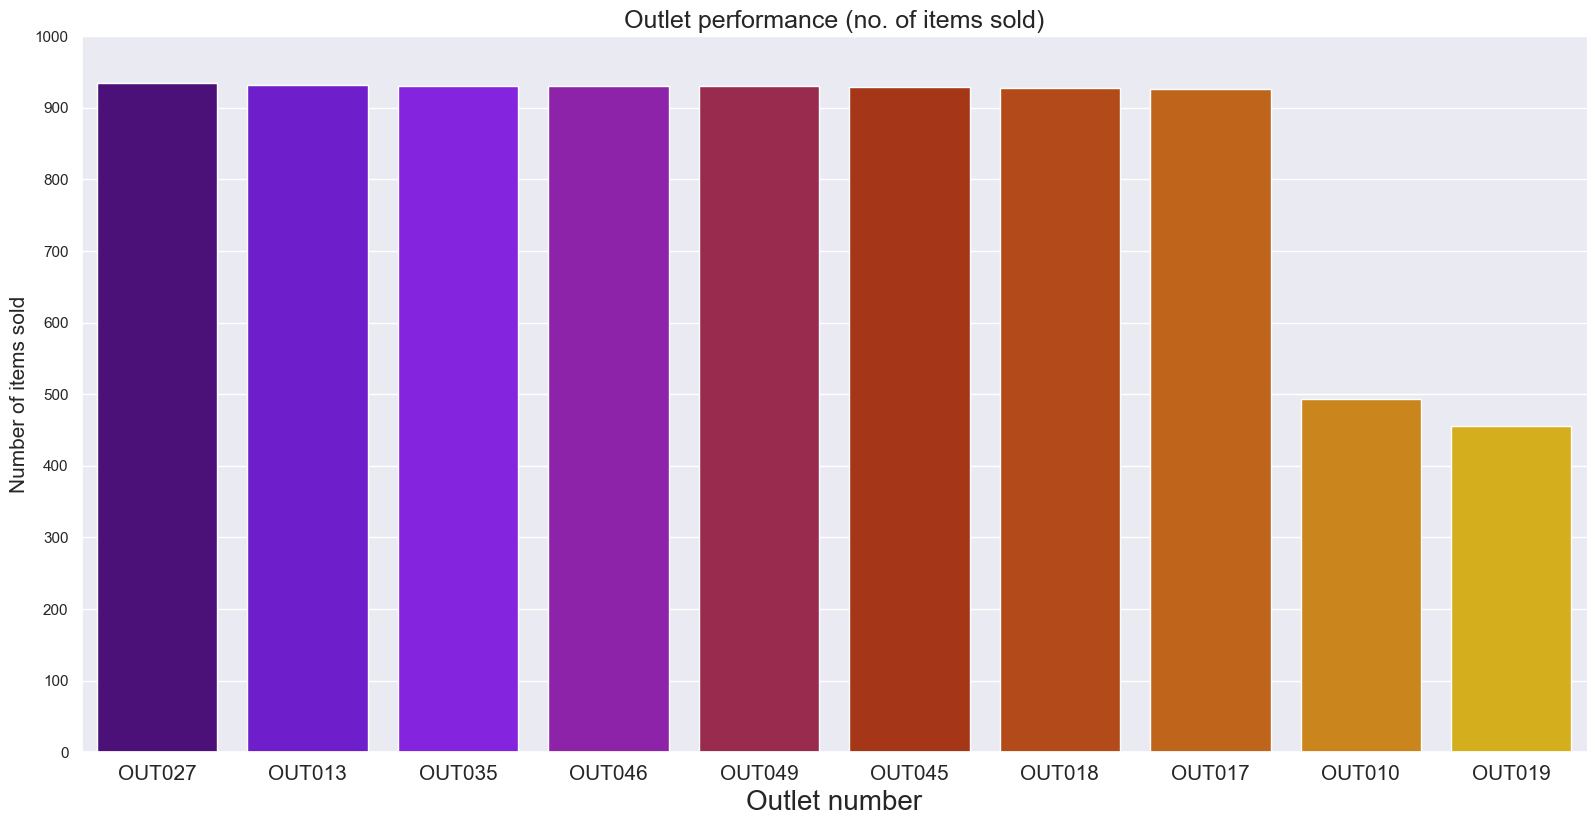

In [29]:
sns.catplot(x='Outlet_Identifier',y='Count',data=df_outlets,aspect=2,height=8,kind='bar',palette='gnuplot')
plt.xticks(size=15)
plt.ylabel('Number of items sold',size=15)
plt.xlabel('Outlet number',size=20)
plt.title('Outlet performance (no. of items sold)',size=18)
plt.yticks(np.arange(0,1100,100))
plt.show()

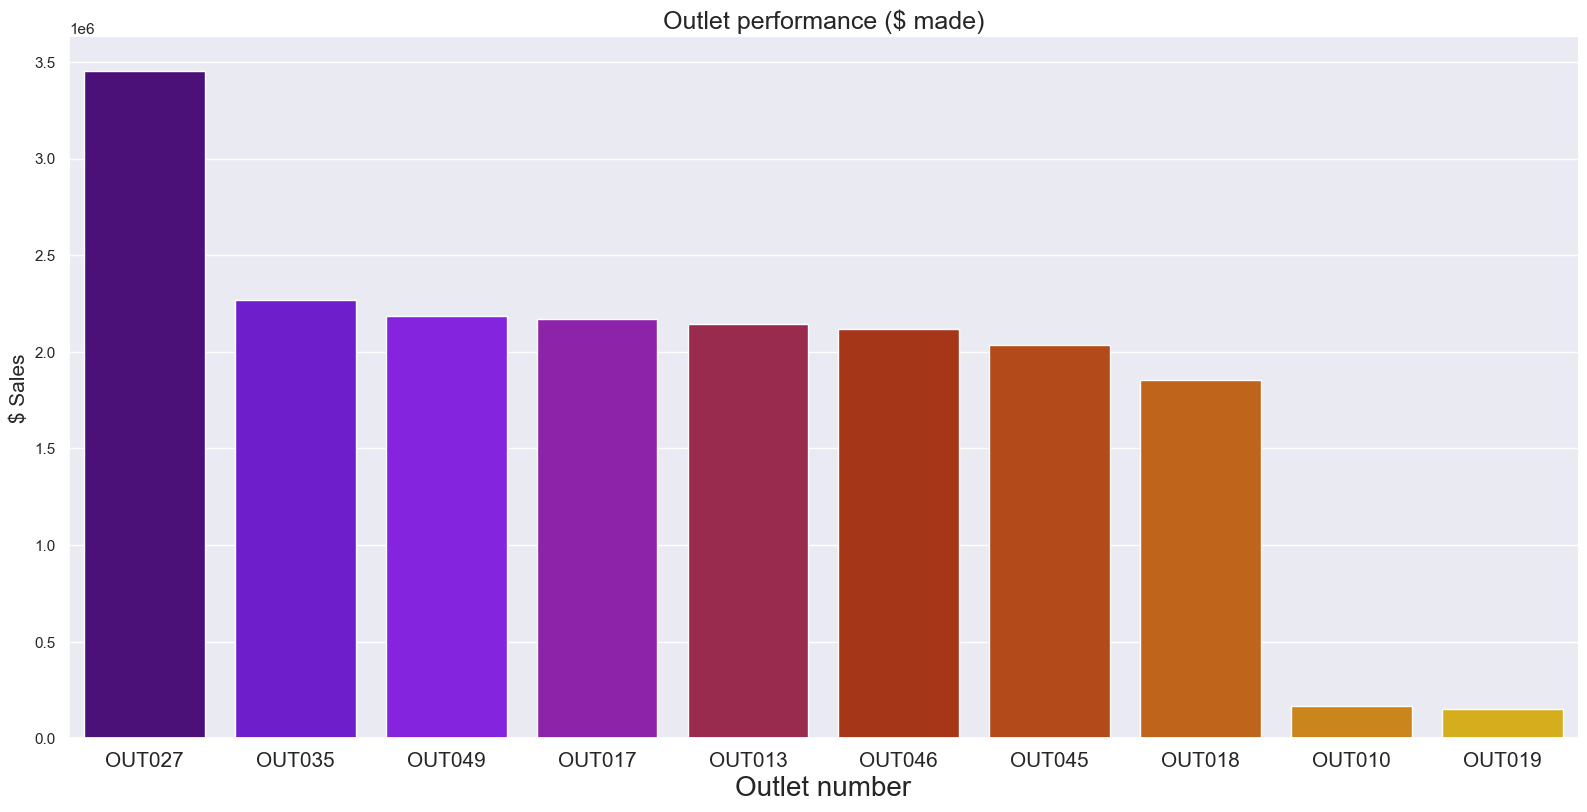

In [30]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df_outlets_2,aspect=2,height=8,kind='bar',palette='gnuplot')
plt.xticks(size=15)
plt.ylabel('$ Sales',size=15)
plt.xlabel('Outlet number',size=20)
plt.title('Outlet performance ($ made)',size=18)
# plt.yticks(np.arange(0,1100,100))
plt.show()

- We can see outlet 27 is performing nearly twice as better than most other outlets (Even though the count of items sold is nearly the same, the money earned is nearly double)
- Outlets 10 and 19 are bringing in very less money
- The rest of the outlets seem to be performing nearly the same

In [31]:
df_train.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT013             Supermarket Type1  High           932
OUT018             Supermarket Type2  Medium         928
OUT019             Grocery Store      Small          456
OUT027             Supermarket Type3  Medium         935
OUT035             Supermarket Type1  Small          930
OUT046             Supermarket Type1  Small          930
OUT049             Supermarket Type1  Medium         930
Name: Outlet_Size, dtype: int64

Outlet 27 is a supermarket type 3 and medium sized. This is our best performer and there is no other outlet combination of supermarket type 3 and size medium.

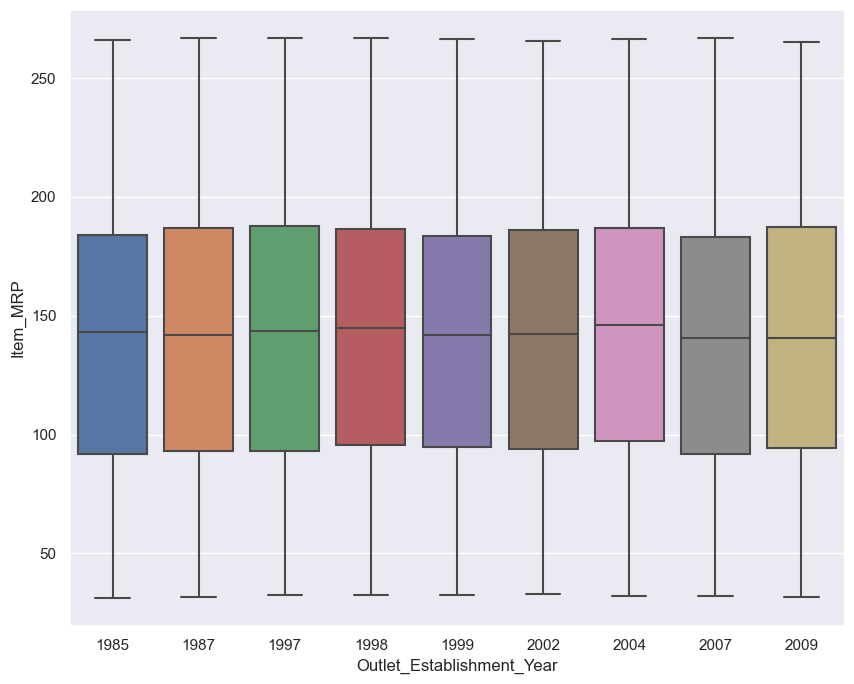

In [32]:
# Next we'll check to see if there's anything of note in the establishment year column
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_MRP',data=df_train)
plt.show()

Looks like the median price doesn't change depending on if the outlet is old or new.

Lets check to see if it has any impact on the sales

Text(0.5, 1.0, 'Outlet sales')

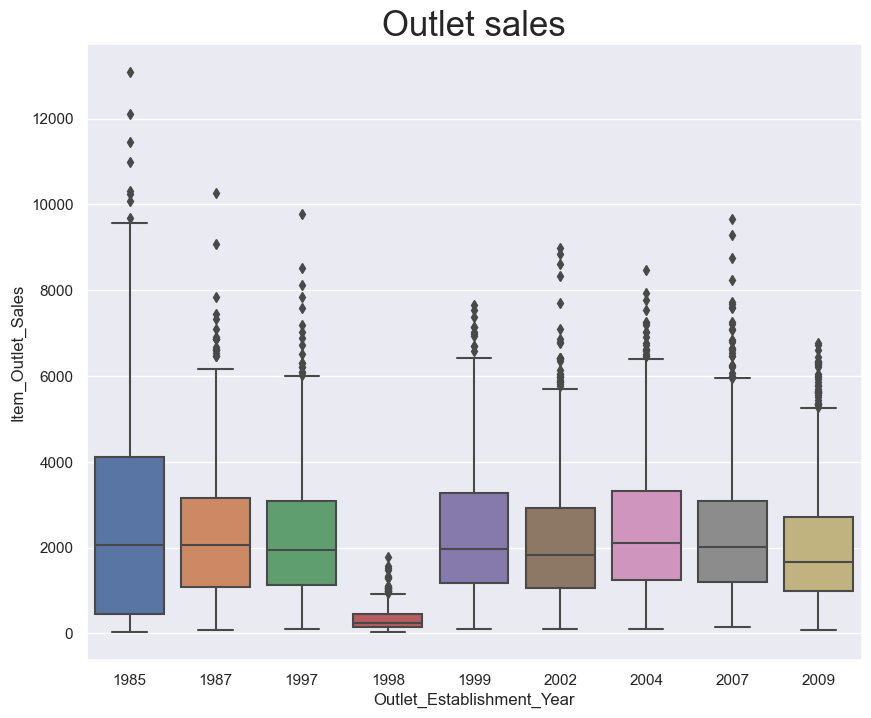

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df_train)
plt.title('Outlet sales',size=25)

Median prices seem to be the same no matter what the year of the shop except for the one (1998)

We will look at outlet sizes next. 

In [34]:
df_size = df_train.groupby('Outlet_Size')['Count'].sum().reset_index()
fig7=px.pie(df_size,values='Count',names='Outlet_Size',hole=0.4)
fig7.update_layout(title='Store sizes',title_x=0.5,annotations=[dict(text='Fat',font_size=15, showarrow=False,height=800,width=900)])
fig7.update_traces(textfont_size=15,textinfo='percent+label')
fig7.show()

In [35]:
df_size_sales = df_train.groupby('Outlet_Size')[['Item_MRP','Item_Outlet_Sales']].mean().reset_index()
df_size_sales

Outlet_Size    Item_MRP  Item_Outlet_Sales
0        High  141.425982        2298.995256
1      Medium  140.590514        2681.603542
2       Small  141.756737        1960.412740

Medium sized stores makes the most amount of money followed by High and then Small. The mean MRP of the goods sold is nearly the same for all the sizes

Lets try to see if outlet_location_type and outlet_type has any relation to MRP and sales

In [36]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Count  
0  Supermarket Type1          3735.1380      1  
1  Supermarket Type2           443.4228      1  
2  Supermarket Type1          2097.2700      1  
3      Grocery Store           732.3800      1  
4  Supermarket Type1           994.7052      1

In [127]:
fig9=px.sunburst(df_train,path=['Outlet_Type', 'Outlet_Location_Type'],color_continuous_scale='RdBu')
fig9.update_layout(title='Store type with location type',title_x=0.5)
fig9.show()

As we can see, majoirty of the stores are of type 1 supermarket distributed over various location tiers.

Supermarket type 2 and 3 are confined to only tier 3 locations. Very small section of the stores are actually grocery stores.

Let us check how do these stores sell based on location tier using a boxplot.

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

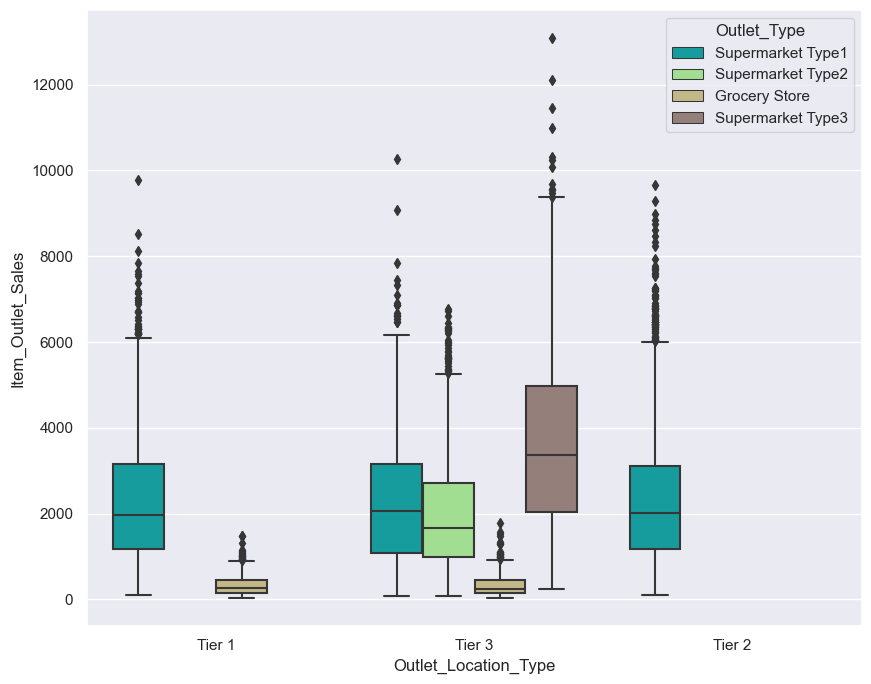

In [38]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=df_train,palette='terrain')

Can be noted that Tier 3 type are selling the most. Especially the combination of Tier 3 and supermarket type 3.

Grocery stores on the other hand are doing pretty bad

Lets plot a correlation plot next

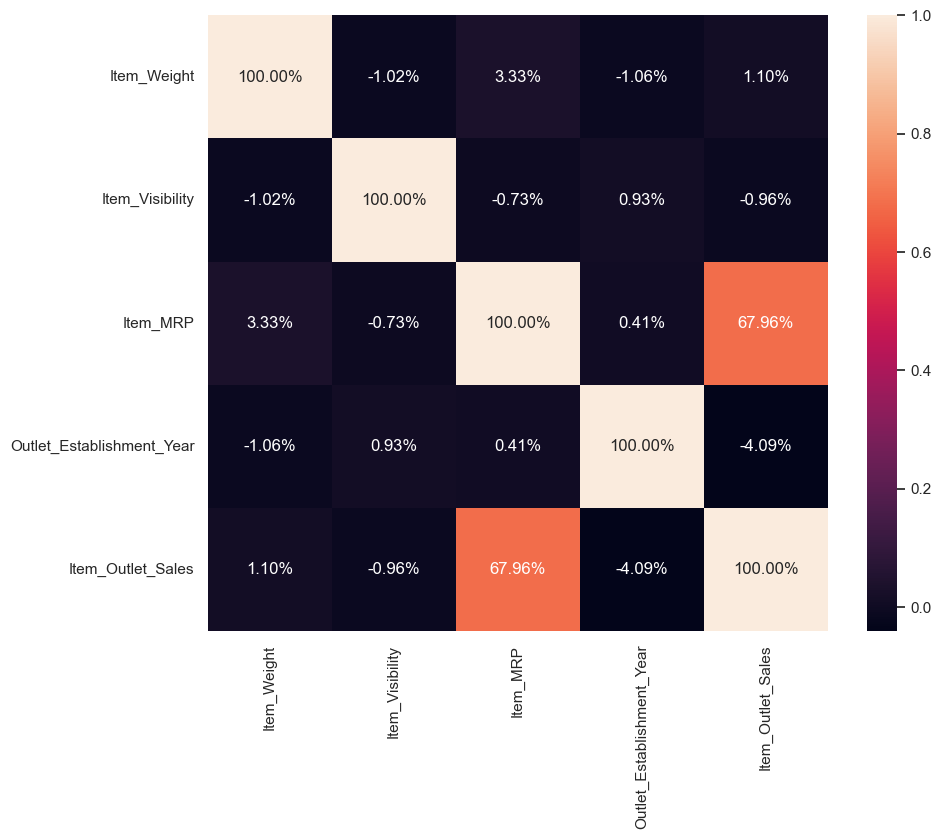

In [39]:
df_train.drop('Count',axis=1,inplace=True)
corr = df_train.dropna().corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt='.2%')
plt.show()

From the above, we can see that correlation of Item_Weight to our target variable Item_Outlet_Sales is extremely low. Hence, we can simply drop this column and get done with the issue of null values.

We shall similarly remove the order_size as there is no way to deal with the null values here aswell. 

We would also get rid of the item_identifier since it is of no consequence to us.

In [40]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1391
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2348
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
unw_cols=['Item_Weight','Outlet_Size','Item_Identifier']

for cols in unw_cols:
    df_train.drop(cols,axis=1,inplace=True)

## Step 3: Data Preprocessing

In [42]:
df_train.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
len(df_train)

8389

In [44]:
# Creating and working with a copy as a precaution
df_train_copy = df_train.copy()

In [45]:
df_train_copy.head(1)

Item_Fat_Content  Item_Visibility Item_Type  Item_MRP Outlet_Identifier  \
0          Low Fat         0.016047     Dairy  249.8092            OUT049   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
0                       1999               Tier 1  Supermarket Type1   

   Item_Outlet_Sales  
0           3735.138

In [46]:
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8389 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8389 non-null   object 
 1   Item_Visibility            8389 non-null   float64
 2   Item_Type                  8389 non-null   object 
 3   Item_MRP                   8389 non-null   float64
 4   Outlet_Identifier          8389 non-null   object 
 5   Outlet_Establishment_Year  8389 non-null   int64  
 6   Outlet_Location_Type       8389 non-null   object 
 7   Outlet_Type                8389 non-null   object 
 8   Item_Outlet_Sales          8389 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 655.4+ KB


Outlet_Establishment_Year is currently an integer but should actually be an object. So we make that change.

After that, we create dummy values for all the categorical columns in our dataframe as a preprocessing steps for ML/Deep Learning.

In [47]:
df_train_copy['Outlet_Establishment_Year'] = df_train_copy['Outlet_Establishment_Year'].astype('object')
df_train_copy = pd.get_dummies(df_train_copy, drop_first=True)
df_train_copy.head()

Item_Visibility  Item_MRP  Item_Outlet_Sales  Item_Fat_Content_Regular  \
0         0.016047  249.8092          3735.1380                         0   
1         0.019278   48.2692           443.4228                         1   
2         0.016760  141.6180          2097.2700                         0   
3         0.000000  182.0950           732.3800                         1   
4         0.000000   53.8614           994.7052                         0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                 0                    0                 0                1   
1                 0                    0                 0                0   
2                 0                    0                 0                0   
3                 0                    0                 0                0   
4                 0                    0                 0                0   

   Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  ...  \
0                       0                                0  ...   
1                       0                                0  ...   
2                       0                                0  ...   
3                       0                                1  ...   
4                       0                                0  ...   

   Outlet_Establishment_Year_1999  Outlet_Establishment_Year_2002  \
0                               1                               0   
1                               0                               0   
2                               1                               0   
3                               0                               0   
4                               0                               0   

   Outlet_Establishment_Year_2004  Outlet_Establishment_Year_2007  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Outlet_Establishment_Year_2009  Outlet_Location_Type_Tier 2  \
0                               0                            0   
1                               1                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
0                            0                              1   
1                            1                              0   
2                            0                              1   
3                            1                              0   
4                            1                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 41 columns]

In [48]:
df_train_copy.columns

Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 

Standardizing our numerical columns for higher accuracy on our models.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_std = ['Item_Visibility', 'Item_MRP']
df_train_copy[col_std] = scaler.fit_transform(df_train_copy[col_std])
df_train_copy.head()

Item_Visibility  Item_MRP  Item_Outlet_Sales  Item_Fat_Content_Regular  \
0        -1.018142  1.747460          3735.1380                         0   
1        -0.948412 -1.488925           443.4228                         1   
2        -1.002759  0.010096          2097.2700                         0   
3        -1.364479  0.660087           732.3800                         1   
4        -1.364479 -1.399124           994.7052                         0   

   Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                 0                    0                 0                1   
1                 0                    0                 0                0   
2                 0                    0                 0                0   
3                 0                    0                 0                0   
4                 0                    0                 0                0   

   Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  ...  \
0                       0                                0  ...   
1                       0                                0  ...   
2                       0                                0  ...   
3                       0                                1  ...   
4                       0                                0  ...   

   Outlet_Establishment_Year_1999  Outlet_Establishment_Year_2002  \
0                               1                               0   
1                               0                               0   
2                               1                               0   
3                               0                               0   
4                               0                               0   

   Outlet_Establishment_Year_2004  Outlet_Establishment_Year_2007  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Outlet_Establishment_Year_2009  Outlet_Location_Type_Tier 2  \
0                               0                            0   
1                               1                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
0                            0                              1   
1                            1                              0   
2                            0                              1   
3                            1                              0   
4                            1                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  
0                              0                              0  
1                              1                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  

[5 rows x 41 columns]

Next step, separating the target column and the independent variables.

In [50]:
targets = df_train_copy['Item_Outlet_Sales']
df_train_copy.drop('Item_Outlet_Sales',axis=1,inplace=True)

Splitting the training data into further training and testing datasets. This is done to test the performance of our model before we deploy it on our prediction dataset (df_test).

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test=train_test_split(df_train_copy,targets,shuffle=True,test_size=0.2,random_state=0)

## Step 4: Machine Learning using Sklearn models
We will build 5 ML models, namely -
- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regressor model (Ensemble type)
- Gradient Boosted Decision Tree (Ensemble type))

Furthermore we will run a GridSearchCV on our RandomForestRegressor to optimize it further.

We will use RMSE (Root mean squared error) to compare the performance of our ML models.

In [52]:
# Linear Regression
from sklearn.linear_model import LinearRegression

reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)

LinearRegression()

In [53]:
reg_lin.score(X_train,y_train)

0.5633823238739916

In [54]:
y_preds_lin = reg_lin.predict(X_test)

In [55]:
rmse_lin = np.sqrt(mean_squared_error(y_test,y_preds_lin))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))

RMSE for Linear Regression:1130.91


Text(0.5, 1.0, 'Linear Regression \n RMSE: 1130.91')

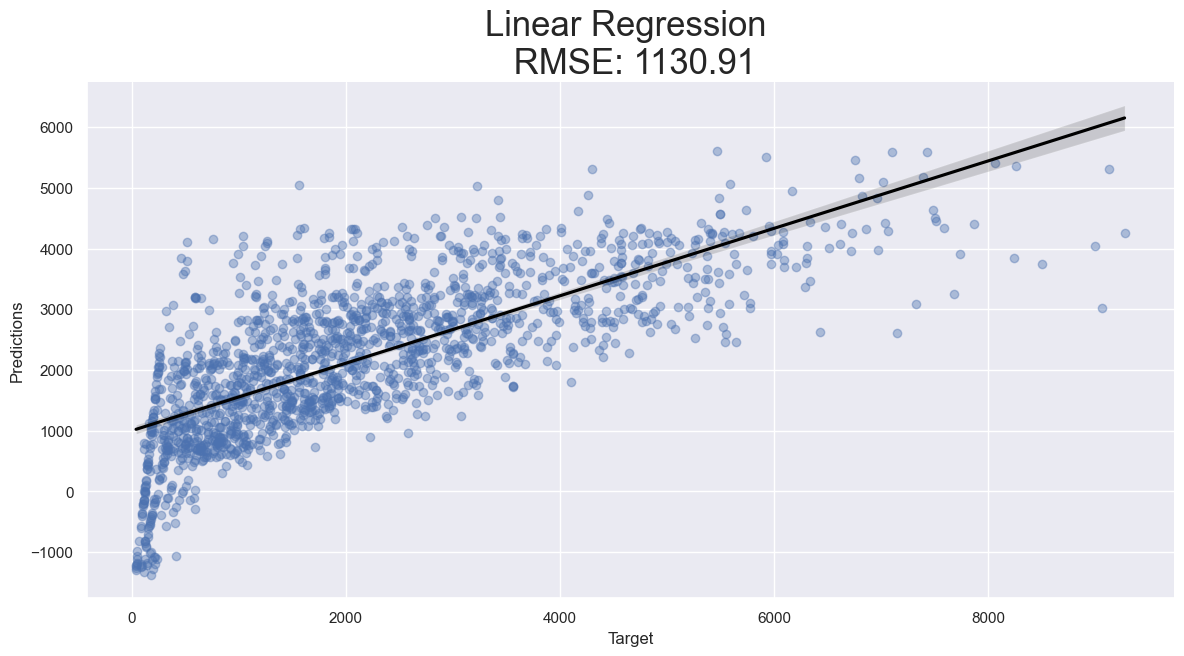

In [56]:
reg_lin_df = pd.DataFrame()
reg_lin_df['Target'] = y_test
reg_lin_df['Predictions'] = y_preds_lin

sns.lmplot(x='Target',y='Predictions',data=reg_lin_df,height=6,aspect=2,line_kws={'color':'black'},scatter_kws={'alpha':0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(rmse_lin),size=25)

As we can see, linear regression couldn't do a good job. The values are too far away from the regression line which is the ideal plotline. The RMSE is quite high too. 

In [57]:
# Ridge Regression¶
# We will apply Ridge regression using a cross validation technique to prevent overfitting. 
# We will also perform a 10 fold cross validation.
from sklearn.linear_model import RidgeCV

In [58]:
reg_rid = RidgeCV(cv=10)
reg_rid.fit(X_train,y_train)

RidgeCV(cv=10)

In [59]:
reg_rid.score(X_train,y_train)

0.5633866214041291

In [60]:
y_preds_rid = reg_rid.predict(X_test)
rmse_rid = np.sqrt(mean_squared_error(y_preds_rid,y_test))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rid))

RMSE for Ridge Regression:1131.00


Text(0.5, 1.0, 'Ridge Regression \n RMSE: 1131.00')

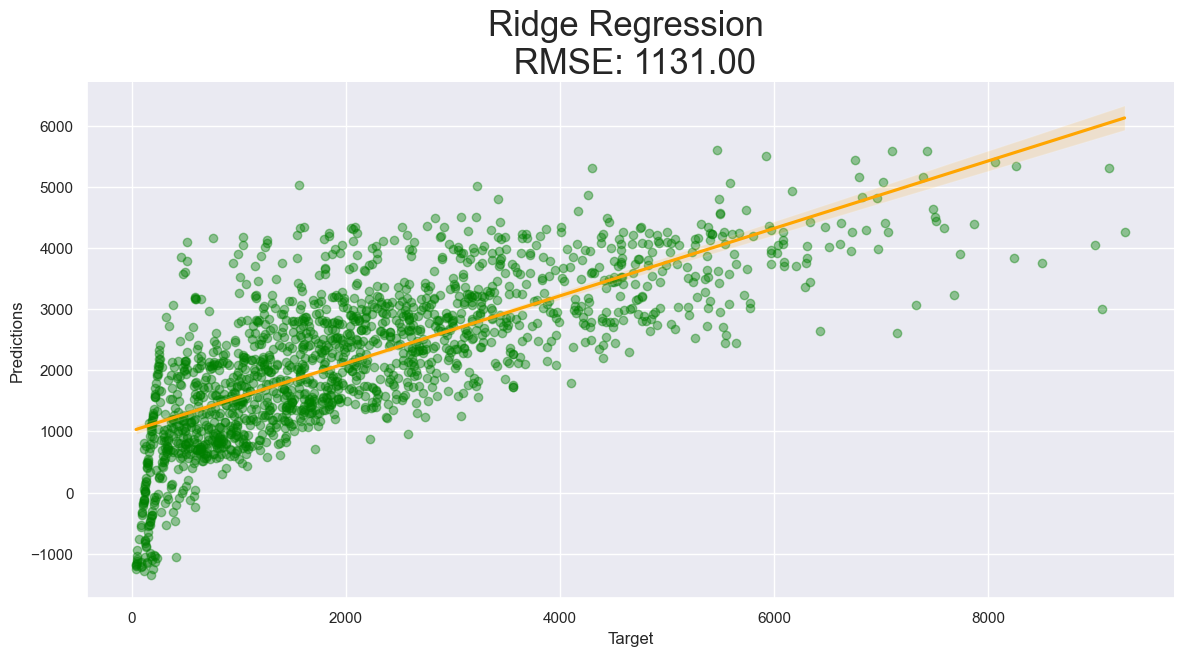

In [61]:
reg_rid_df=pd.DataFrame()
reg_rid_df['Target']=y_test
reg_rid_df['Predictions']=y_preds_rid

sns.lmplot(x='Target', y='Predictions',data=reg_rid_df,height=6,aspect=2,line_kws={'color':'orange'},scatter_kws={'alpha':0.4,'color':'green'})
plt.title('Ridge Regression \n RMSE: {0:.2f}'.format(rmse_rid),size=25)

As we can see, both linear and ridge regression have performed quite similarly with nearly identical RMSE scores.

In [62]:
# Lasso Regression
# This is another regression technique that utlises the L1 regularisation. Let us see how it performs.

from sklearn.linear_model import Lasso
reg_las=Lasso()
reg_las.fit(X_train,y_train)

Lasso()

In [63]:
reg_las.score(X_train,y_train)

0.5632646520143751

In [64]:
y_preds_las = reg_las.predict(X_test)
rmse_las = np.sqrt(mean_squared_error(y_preds_las,y_test))
print('RMSE for Lasso Regression:{0:.2f}'.format(rmse_las))

RMSE for Lasso Regression:1129.26


Text(0.5, 1.0, 'Lasso Regression \n RMSE: 1129.26')

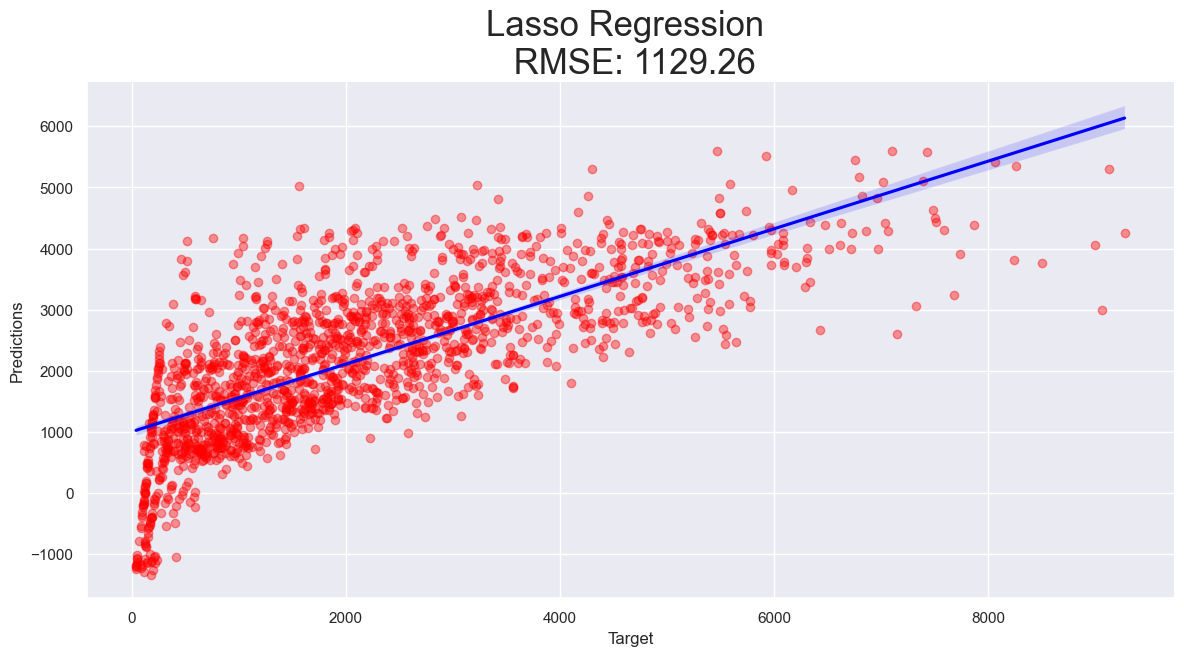

In [65]:
reg_las_df = pd.DataFrame()
reg_las_df['Target'] = y_test
reg_las_df['Predictions'] = y_preds_las

sns.lmplot(x='Target',y='Predictions',data=reg_las_df,height=6,aspect=2,line_kws={'color':'blue'},scatter_kws={'alpha':0.4,'color':'red'})
plt.title('Lasso Regression \n RMSE: {0:.2f}'.format(rmse_las),size=25)

From the above models, we have realised that all the regression techniques with and without regularisations have yielded similar results.

Let us move on to an Ensemble methods¶



Let us apply Random Forest regression using a hyperparameter tuning method called GridSearchCV where we shall change n_estimators and max_depth. We also apply a cross validation of 10.

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [67]:
# First running the Random Forest without hypertuning its parameters
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [68]:
rf.score(X_train, y_train)

0.936654776618866

In [69]:
y_preds_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_preds_rf,y_test))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_rf))

RMSE for Random Forest Regression:1118.52


Text(0.5, 1.0, 'Random Forest Regression \n RMSE: 1118.52')

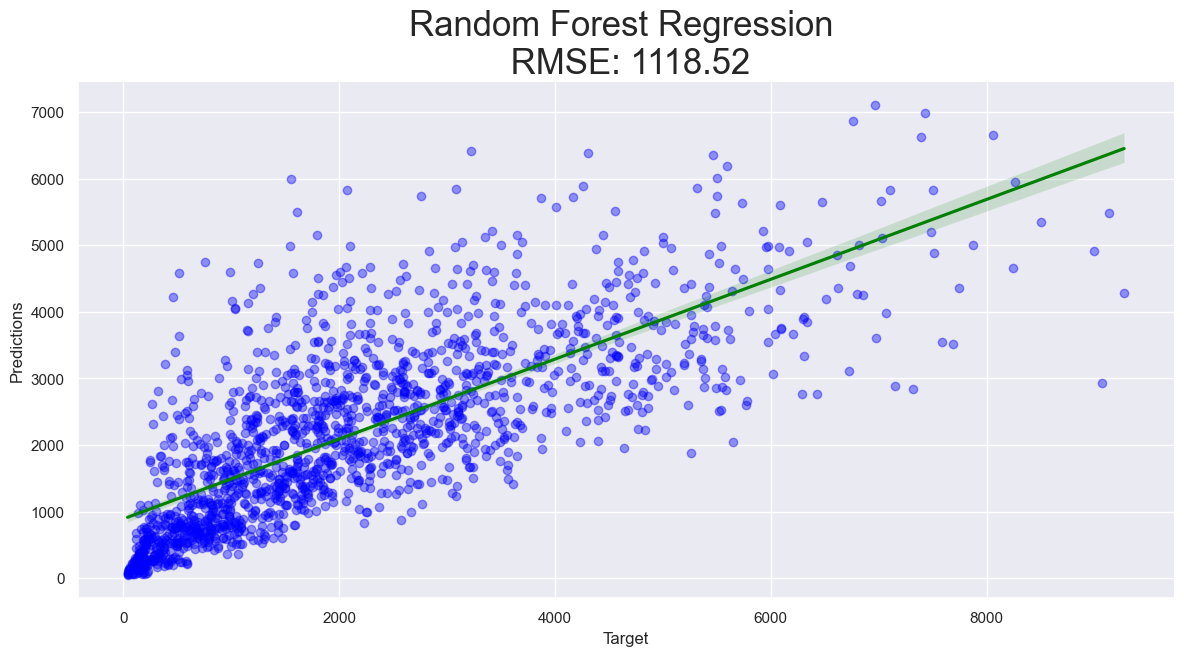

In [70]:
rf_df = pd.DataFrame()
rf_df['Target'] = y_test
rf_df['Predictions'] = y_preds_rf

sns.lmplot(x='Target', y='Predictions',data=rf_df,height=6,aspect=2,line_kws={'color':'green'},scatter_kws={'alpha':0.4,'color':'blue'})
plt.title('Random Forest Regression \n RMSE: {0:.2f}'.format(rmse_rf),size=25)

In [71]:
# Trying out GridSearchCV to see if we can optimize our RandomForestRegressor

param_grid = {'n_estimators':range(5,100,5), 'max_depth':[5,7,9,10,12]}
grid = GridSearchCV(rf, param_grid, scoring='r2', cv=10)

In [72]:
grid_result = grid.fit(X_train,y_train)
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 35}

In [73]:
grid_result.score(X_train,y_train)

0.6136172348029199

In [74]:
y_preds_rfr = grid_result.predict(X_test)
rmse_rfr = np.sqrt(mean_squared_error(y_preds_rfr,y_test))
print('RMSE for Optimized Random Forest Regression:{0:.2f}'.format(rmse_rfr))

RMSE for Optimized Random Forest Regression:1077.51


Text(0.5, 1.0, 'Random Forest Regression \n RMSE: 1077.51')

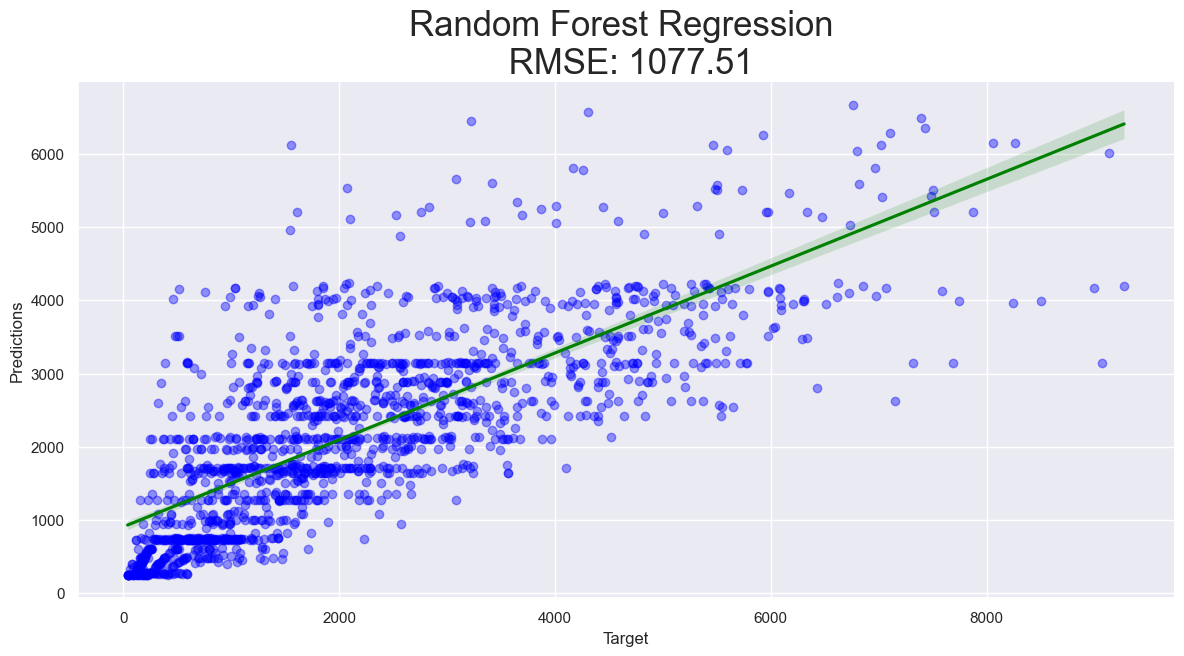

In [75]:
# We can see a slight increase in performance after hypertuning but still pretty bad overall
rfr_df=pd.DataFrame()
rfr_df['Target']=y_test
rfr_df['Predictions']=y_preds_rfr

sns.lmplot(x='Target',y='Predictions',data=rfr_df,height=6,aspect=2,line_kws={'color':'green'},scatter_kws={'alpha':0.4,'color':'blue'})
plt.title('Random Forest Regression \n RMSE: {0:.2f}'.format(rmse_rfr),size=25)

In [77]:
df_train['Item_Outlet_Sales'].mean()

2210.748304374776

The optimized Random Forest slightly improved the model performance but ideally we want much better results. The error rate of our models when compared to the mean of the target columns is way too high (near around 50%)

We will try one more regressor before trying out a deep learning solution

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
# Our final ML model Gradient Boosted Decision Tree

gbdt = GradientBoostingRegressor(random_state=0)
gbdt.fit(X_train,y_train)
gbdt.score(X_train,y_train)

0.6284684996159025

In [80]:
y_preds_gbdt = gbdt.predict(X_test)
rmse_gbdt = np.sqrt(mean_squared_error(y_preds_gbdt,y_test))
print('RMSE for Gradient boosted Decision Tree:{0:.2f}'.format(rmse_gbdt))

RMSE for Gradient boosted Decision Tree:1082.53


Text(0.5, 1.0, 'GBDT Regression \n RMSE: 1082.53')

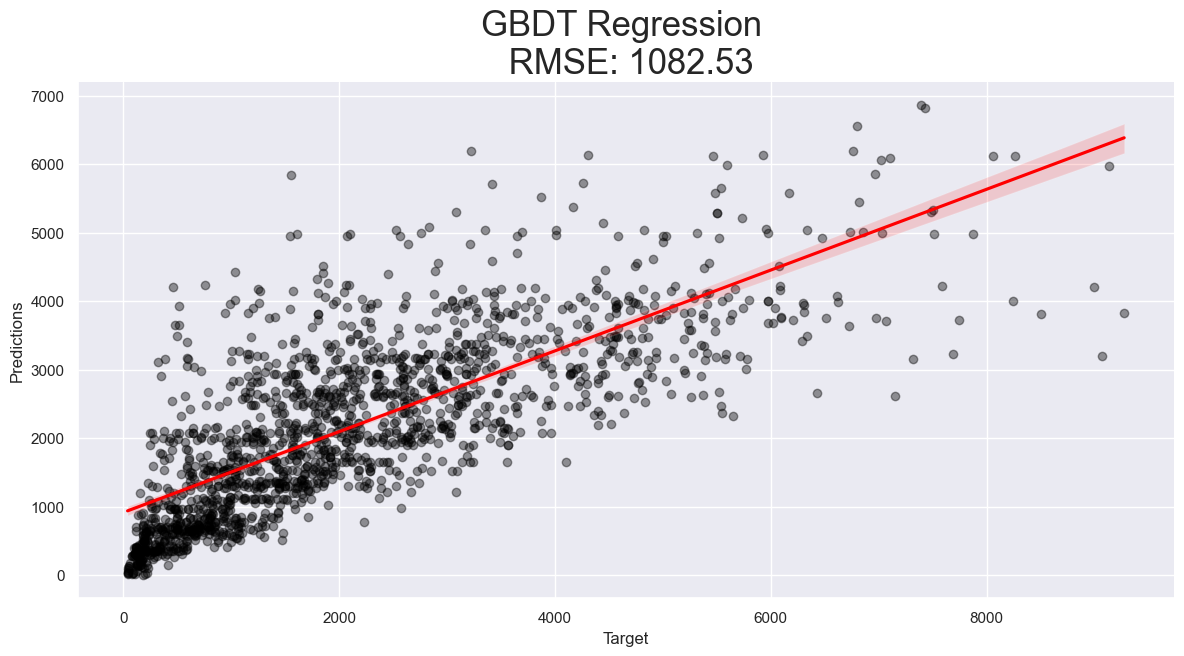

In [81]:
gbdt_df = pd.DataFrame()
gbdt_df['Target'] = y_test
gbdt_df['Predictions'] = y_preds_gbdt

sns.lmplot(x='Target', y='Predictions',data=gbdt_df,height=6,aspect=2,line_kws={'color':'red'},scatter_kws={'alpha':0.4,'color':'black'})
plt.title('GBDT Regression \n RMSE: {0:.2f}'.format(rmse_gbdt),size=25)

## Step 5: Deep Learning

All our ML models seem to give us a similar result.

Let's try out a Deep Learning solution to see if we can get a better model

We'll try out 2 different models, 1 fairly basic with 2 hidden layers and one more complex with 5 hidden layers.

In [84]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_1.compile(optimizer='adam', loss='mean_squared_error')

# Create an EarlyStopping callback so as to stop training when the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [85]:
# Create a History callback to track training metrics
history_1 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/100
210/210 [==============================] - 1s 1ms/step - loss: 6762692.0000 - val_loss: 3399095.5000
Epoch 2/100
210/210 [==============================] - 0s 974us/step - loss: 2088243.0000 - val_loss: 1557844.0000
Epoch 3/100
210/210 [==============================] - 0s 979us/step - loss: 1447461.6250 - val_loss: 1338333.5000
Epoch 4/100
210/210 [==============================] - 0s 969us/step - loss: 1298887.6250 - val_loss: 1264032.2500
Epoch 5/100
210/210 [==============================] - 0s 960us/step - loss: 1256616.5000 - val_loss: 1242255.6250
Epoch 6/100
210/210 [==============================] - 0s 1ms/step - loss: 1237720.6250 - val_loss: 1223800.2500
Epoch 7/100
210/210 [==============================] - 0s 965us/step - loss: 1229707.2500 - val_loss: 1215719.8750
Epoch 8/100
210/210 [==============================] - 0s 960us/step - loss: 1223369.7500 - val_loss: 1212734.6250
Epoch 9/100
210/210 [==============================] - 0s 949us/step - loss: 1219867

In [88]:
loss_values = history_1.history['loss']

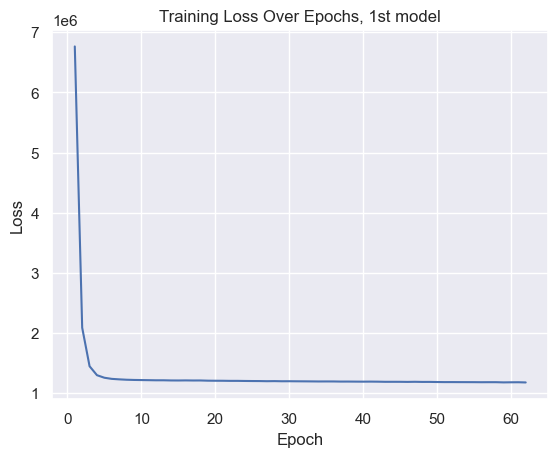

In [90]:
plt.plot(range(1, len(loss_values) + 1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs, 1st model')
plt.show()

In [129]:
y_pred_dl = model_1.predict(X_test)
rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))
print(f"Root Mean Squared Error (RMSE) for model 1: {rmse_dl:.2f}")

53/53 [==============================] - 0s 608us/step
Root Mean Squared Error (RMSE) for model 1: 1074.70


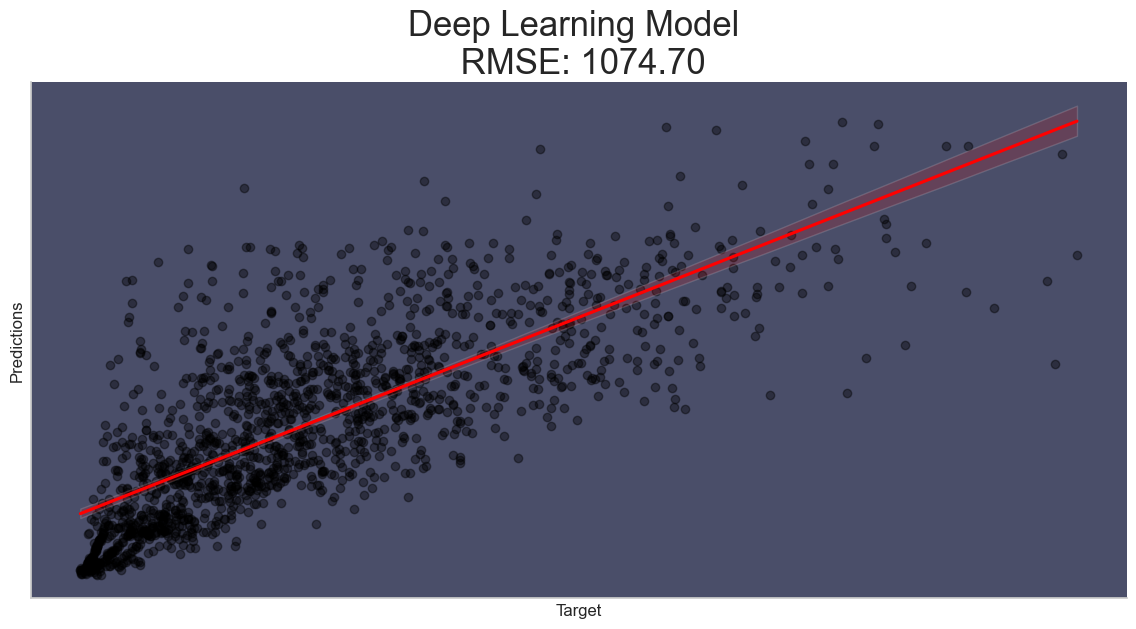

In [146]:
dl_df=pd.DataFrame()
dl_df['Target']=y_test
dl_df['Predictions']=y_pred_dl

plot = sns.lmplot(x='Target', y='Predictions',data=dl_df,height=6,aspect=2,line_kws={'color':'red'},scatter_kws={'alpha':0.4,'color':'black'})
plot.ax.set_facecolor("#4A4E69")
plt.title('Deep Learning Model \n RMSE: {0:.2f}'.format(rmse_dl),size=25)
plot.set(xticks=[], yticks=[])

In [95]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer='adam', loss='mean_squared_error')

# Create an EarlyStopping callback so as to stop training when the model stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [96]:
history_2 = model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)
loss_values = history_1.history['loss']

Epoch 1/100
210/210 [==============================] - 0s 1ms/step - loss: 1180737.8750 - val_loss: 1162160.7500
Epoch 2/100
210/210 [==============================] - 0s 997us/step - loss: 1181153.3750 - val_loss: 1160840.7500
Epoch 3/100
210/210 [==============================] - 0s 1000us/step - loss: 1180258.2500 - val_loss: 1161047.8750
Epoch 4/100
210/210 [==============================] - 0s 999us/step - loss: 1179068.6250 - val_loss: 1159254.7500
Epoch 5/100
210/210 [==============================] - 0s 1ms/step - loss: 1179862.8750 - val_loss: 1160158.3750
Epoch 6/100
210/210 [==============================] - 0s 1ms/step - loss: 1177764.6250 - val_loss: 1161570.5000
Epoch 7/100
210/210 [==============================] - 0s 991us/step - loss: 1176219.7500 - val_loss: 1159078.2500
Epoch 8/100
210/210 [==============================] - 0s 982us/step - loss: 1176298.1250 - val_loss: 1159545.2500
Epoch 9/100
210/210 [==============================] - 0s 962us/step - loss: 1176360.

In [98]:
y_pred_dl_2 = model_2.predict(X_test)
rmse_dl_2 = np.sqrt(mean_squared_error(y_test, y_pred_dl))
print(f"Root Mean Squared Error (RMSE) for model 2: {rmse_dl_2:.2f}")

53/53 [==============================] - 0s 640us/step
Root Mean Squared Error (RMSE) for model 2: 1077.60


Both the Deep Learning models performed the same, giving us a RMSE value of 1077.6

Our top 3 models were, in the order from best to worst-
1) Optimized Random Forest Regressor (RMSE: 1077.5)
2) Deep Learning Model (RMSE: 1077.6)
3) Gradient Boosted Regressor (RMSE: 1082.5)


So we'll apply these models to the testing dataframe to see how they perform. but before that we need to transform our test data into the correct format

## Step 6: Predicting Sales

In [100]:
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [101]:
df_test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [102]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [103]:
# Creating a separate df for our unique IDs so we can later match our predicted sales to these values

df_identifiers=pd.DataFrame(df_test['Item_Identifier'])
df_identifiers['Outlet_Identifier']=df_test['Outlet_Identifier']

In [104]:
unw_cols=['Item_Weight','Outlet_Size','Item_Identifier']

for cols in unw_cols:
    df_test.drop(cols,axis=1,inplace=True)

In [105]:
df_test.isnull().sum()

Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [106]:
df_train.head()

Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP  \
0          Low Fat         0.016047                  Dairy  249.8092   
1          Regular         0.019278            Soft Drinks   48.2692   
2          Low Fat         0.016760                   Meat  141.6180   
3          Regular         0.000000  Fruits and Vegetables  182.0950   
4          Low Fat         0.000000              Household   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Location_Type  \
0            OUT049                       1999               Tier 1   
1            OUT018                       2009               Tier 3   
2            OUT049                       1999               Tier 1   
3            OUT010                       1998               Tier 3   
4            OUT013                       1987               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [107]:
df_test.head()

Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP Outlet_Identifier  \
0          Low Fat         0.007565  Snack Foods  107.8622            OUT049   
1              reg         0.038428        Dairy   87.3198            OUT017   
2          Low Fat         0.099575       Others  241.7538            OUT010   
3          Low Fat         0.015388  Snack Foods  155.0340            OUT017   
4          Regular         0.118599        Dairy  234.2300            OUT027   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  
0                       1999               Tier 1  Supermarket Type1  
1                       2007               Tier 2  Supermarket Type1  
2                       1998               Tier 3      Grocery Store  
3                       2007               Tier 2  Supermarket Type1  
4                       1985               Tier 3  Supermarket Type3

In [108]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('low fat','Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('LF','Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg','Regular')

In [109]:
df_test['Outlet_Establishment_Year'] = df_test['Outlet_Establishment_Year'].astype('object')
df_test = pd.get_dummies(df_test, drop_first=True)

In [110]:
col_std = ['Item_Visibility', 'Item_MRP']
df_test[col_std] = scaler.transform(df_test[col_std])
print(df_test.columns)
df_test.head()

Index(['Item_Visibility', 'Item_MRP', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment

Item_Visibility  Item_MRP  Item_Fat_Content_Regular  Item_Type_Breads  \
0        -1.201213 -0.531964                         0                 0   
1        -0.535124 -0.861840                         1                 0   
2         0.784569  1.618104                         0                 0   
3        -1.032363  0.225534                         0                 0   
4         1.195158  1.497285                         1                 0   

   Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                    0                 0                0   
1                    0                 0                1   
2                    0                 0                0   
3                    0                 0                0   
4                    0                 0                1   

   Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
0                       0                                0   
1                       0                                0   
2                       0                                0   
3                       0                                0   
4                       0                                0   

   Item_Type_Hard Drinks  ...  Outlet_Establishment_Year_1999  \
0                      0  ...                               1   
1                      0  ...                               0   
2                      0  ...                               0   
3                      0  ...                               0   
4                      0  ...                               0   

   Outlet_Establishment_Year_2002  Outlet_Establishment_Year_2004  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Outlet_Establishment_Year_2007  Outlet_Establishment_Year_2009  \
0                               0                               0   
1                               1                               0   
2                               0                               0   
3                               1                               0   
4                               0                               0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            1                            0   
2                            0                            1   
3                            1                            0   
4                            0                            1   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              1                              0   
2                              0                              0   
3                              1                              0   
4                              0                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              1  

[5 rows x 40 columns]

In [111]:
# Runnign the optimized Linear Regression
y_preds_rfr = grid_result.predict(df_test)

In [112]:
# Gradient Boosted regressor
y_preds_gbdt = gbdt.predict(df_test)

In [113]:
# Deep learning model
y_pred_dl = model_1.predict(df_test)

178/178 [==============================] - 0s 576us/step


In [117]:
model_df = pd.DataFrame(data={"Random Forest":y_preds_rfr,"Gradient Boosted RF":y_preds_gbdt,
                                  "Deep Learning":y_pred_dl.flatten()})
# submission_df
print(len(y_preds_rfr), y_preds_rfr.shape )
print(len(y_preds_gbdt), y_preds_gbdt.shape)
print(len(y_pred_dl), y_pred_dl.shape)

5681 (5681,)
5681 (5681,)
5681 (5681, 1)


In [118]:
model_df.head()

Random Forest  Gradient Boosted RF  Deep Learning
0    1708.499350          1646.950977    1715.171875
1    1348.337471          1363.779498    1451.413818
2     607.949342           637.567592     636.633240
3    2431.489114          2594.420089    2596.356201
4    6190.083469          5839.905692    5667.131348

In [119]:
# We'll use a mean of these 3 different models as our final prediction for the prediction dataset products

model_df['mean'] = round(( model_df['Random Forest'] + model_df['Gradient Boosted RF'] \
                        + model_df['Deep Learning'])/3, 2)
model_df.head()

Random Forest  Gradient Boosted RF  Deep Learning     mean
0    1708.499350          1646.950977    1715.171875  1690.21
1    1348.337471          1363.779498    1451.413818  1387.84
2     607.949342           637.567592     636.633240   627.38
3    2431.489114          2594.420089    2596.356201  2540.76
4    6190.083469          5839.905692    5667.131348  5899.04

In [121]:
df_predicted_sales = df_identifiers
df_predicted_sales['Predicted Sales'] = model_df['mean']

In [124]:
# This is the final datafame with the predicted sales values
print(df_predicted_sales['Predicted Sales'].mean())
df_predicted_sales

2180.941728568914


Item_Identifier Outlet_Identifier  Predicted Sales
0              FDW58            OUT049          1690.21
1              FDW14            OUT017          1387.84
2              NCN55            OUT010           627.38
3              FDQ58            OUT017          2540.76
4              FDY38            OUT027          5899.04
...              ...               ...              ...
5676           FDB58            OUT046          2185.59
5677           FDD47            OUT018          2298.32
5678           NCO17            OUT045          1860.17
5679           FDJ26            OUT017          3704.11
5680           FDU37            OUT045          1283.21

[5681 rows x 3 columns]

## Step 7: Conclusion

In this study, we used food products data from a chain of stores to build a sales prediction model. Even though the model is not as accurate as we like, we now have a framework to build upon and eventually find a model that is deployable in the real world. We can go about this in many ways, some of which include:
- Adding new variables in our data collection stage (Promotion, day of week, month, holiday period, etc)
- Hypertuning our models even further and trying out more ML models on the same data.
- Ensuring the data is entered correctly so we dont have to delete columns like Outlet size and product weight.

That said, the exploratoty data analysis helped us find some interesting insights.


#### Key Insights
1) Outlet **OUT027** is making the most amount of money.
2) Outlet location tier 3 seem to make the most sales. Especially the combination of Tier 3 location and SuperMarket Type 3.
3) Starchy foods and Dairy have high MRPs whereas Seafood and Starchy food seem to be making more sales on average.
4) Grocery Stores have been the worst performers compared to all other supermarket types.
5) Medium sized stores make the most amount of money followed by High and then Small. The mean MRP of the goods sold is nearly the same for all the sizes.